In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10, array
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colormaps

font = {'family' : 'Arial',
        'size'   : 16}

plt.rc('font', **font)

# Defining the ODE model 

In [2]:
def model(z,t, params):
    kf, kr, A, n = params
    # kf: forward rate
    # kr: reverse rate 
    # A: Arp density 
    # n: number of clusters
    F, G = z
    dFdt = kf*F*G**2 *A - kr*F
    dGdt = -dFdt
    return [dFdt, dGdt]

# Solving the ODE for a parameter set

In [3]:
def getActinLevel(IC = [1,10], params=(1,1,1,1)):
    kf, kr, A, n = params
    # long enough to reach steady state 
    t = np.linspace(0, 500, 1000)
    zList = [odeint(model, IC, t, args=((kf,kr,a,n),)) for a in A]
    FA = [z[-1,0] for z in zList]
    return FA

# Effect of Arp2/3 density

Text(0, 0.5, 'F')

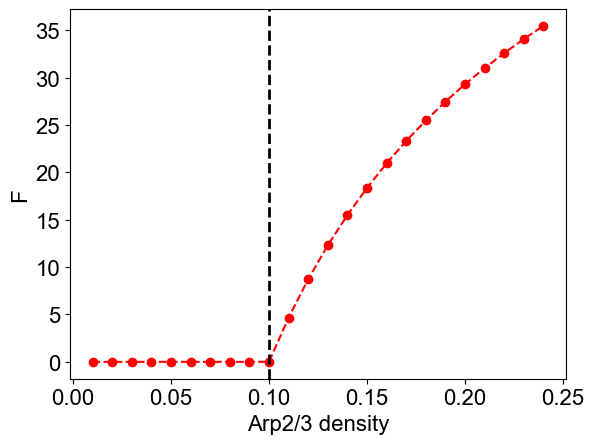

In [4]:
arpList = np.arange(0.01,0.25,0.01)

FA = getActinLevel(IC = [0.01, 100], params=(0.001,1,arpList,1))

plt.plot(arpList, FA, 'ro--')
plt.axvline(0.1, ls='dashed', lw=2, c='k')
plt.xlabel('Arp2/3 density')
plt.ylabel('F')

## State space of Arp2/3 critical level 

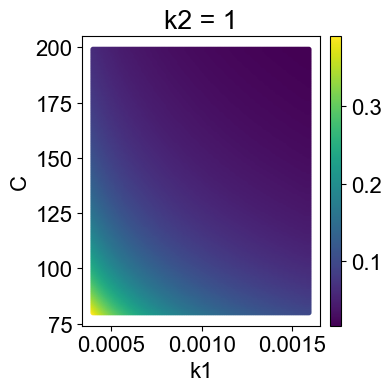

In [5]:
alpha_calc = lambda k1,k2,C: k2/(k1*C**2)

k2 = 1
k1List = np.arange(0.0004,0.0016,0.00001)
cList = np.arange(80,200,1)

X, Y = np.meshgrid(k1List, cList)
xx, yy = X.flatten(), Y.flatten()

aList = []

for x,y in zip(xx,yy):
    aList.append(alpha_calc(k1=x,k2=k2,C=y))

fig, ax = plt.subplots(figsize=(4.2,4.2))

cm = colormaps['viridis']
scat = ax.scatter(X.flatten(), Y.flatten(), c=aList, cmap=cm, s=9)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = fig.colorbar(scat, cax=cax, orientation='vertical')
ax.set_xlabel('k1')
ax.set_ylabel('C')
ax.set_title('k2 = 1')
plt.tight_layout()